<a href="https://colab.research.google.com/github/jumbokh/ML-Class/blob/main/imdb_ana_v2-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb    #← 從 keras.datasets 套件中匯入 imdb
(a_train, b_train),(a_test, b_test)= imdb.load_data(num_words=10000) # 載入 IMDB

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tok = Tokenizer(num_words=10000)           #←指定字典的總字數
x_train = tok.sequences_to_matrix(a_train) #←將訓練樣本做 k-hot 編碼
x_test  = tok.sequences_to_matrix(a_test)  #←將測試樣本做 k-hot 編碼

y_train = b_train.astype('float32')   #←將訓練標籤轉為浮點向量
y_test  = b_test.astype('float32')    #←將測試標籤轉為浮點向量

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers
model = Sequential()                       #←建立模型物件
model.add(Dense(16, activation='relu', input_dim=10000))  #←輸入層
model.add(layers.Dropout(0.3))
#model.add(Dense(8,kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'))    #←隱藏層
model.add(layers.Dropout(0.3))
model.add(Dense(16, activation='relu'))    #←隱藏層
model.add(Dense(1, activation='sigmoid'))  #←輸出層

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=512,  #←每批次 512 筆樣本
                    epochs=6,       #←共訓練 10 週期
                    verbose = 2,     #←顯示精簡訊息 (無進度條)
                    validation_split=0.2)
                             #↑由訓練資料後面切出 20% 做為驗證用

Epoch 1/6
40/40 - 2s - loss: 0.5562 - acc: 0.7409 - val_loss: 0.4153 - val_acc: 0.8644
Epoch 2/6
40/40 - 1s - loss: 0.3863 - acc: 0.8522 - val_loss: 0.3229 - val_acc: 0.8836
Epoch 3/6
40/40 - 1s - loss: 0.3048 - acc: 0.8873 - val_loss: 0.2898 - val_acc: 0.8886
Epoch 4/6
40/40 - 1s - loss: 0.2565 - acc: 0.9070 - val_loss: 0.2678 - val_acc: 0.8926
Epoch 5/6
40/40 - 1s - loss: 0.2189 - acc: 0.9207 - val_loss: 0.2680 - val_acc: 0.8936
Epoch 6/6
40/40 - 0s - loss: 0.1891 - acc: 0.9304 - val_loss: 0.2815 - val_acc: 0.8946


In [ ]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.2991 - acc: 0.8850


In [ ]:
results

[0.29910939931869507, 0.8849599957466125]

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

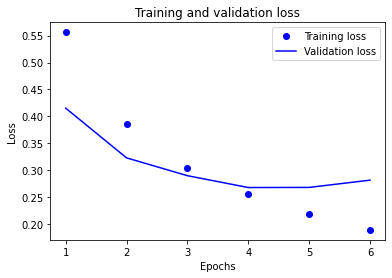

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

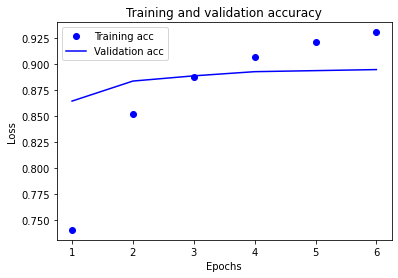

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model.save_weights('IMDB.weight')